In [1]:
# relevant imports

from typing import Dict, List

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# increase size of text on figures and make it clearer

plt.rc("axes", titlesize=18)
plt.rc("axes", labelsize=17)
plt.rc("xtick", labelsize=15)
plt.rc("ytick", labelsize=15)
plt.rc("legend", fontsize=14)
plt.rc("font", size=14)
plt.rc("lines", linewidth=2)

In [8]:
# loads sheets + clean them

tabular_sheets = [pd.read_csv("tabular/tabular-2022-04-06 19-25-52.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 19-26-00.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 20-10-37.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 20-20-09.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 20-21-41.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 21-06-54.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 21-24-37.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 23-19-45.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 23-59-08.csv"),
                  pd.read_csv("tabular/tabular-2022-04-06 23-59-08.csv"),
                  pd.read_csv("tabular/tabular-2022-04-07 02-01-19.csv"),
                  pd.read_csv("tabular/tabular-2022-04-07 02-17-17.csv"),
                  pd.read_csv("tabular/tabular-2022-04-07 02-22-03.csv")]

for idx, tab_sheet in enumerate(tabular_sheets):
    tabular_sheets[idx] = tab_sheet.drop(["Unnamed: 0"], axis=1)
    tabular_sheets[idx]["model"] = tab_sheet["model"].fillna("Tabular")

df = pd.concat(tabular_sheets, ignore_index=True)

In [9]:
df

,model,lookback,epsilon,epsilon_decay,decay_limit,learning_rate,discount_rate,epochs,tr_cooperation_percentage,tr_defection_percentage,tr_final_loss,tr_mean_reward,tr_cumul_reward,tr_cumul_regret,tn_rank,tn_mean_score,tn_mean_time,agents
0,Tabular,1,0.05,0.0,0.05,0.001,0.95,2500,0.695561,0.304439,NaN,2.553634,11491351.0,2008649.0,22,743.071613,3.965786,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
1,Tabular,1,0.05,0.0,0.05,0.001,0.99,2500,0.924345,0.075655,NaN,2.864299,12889347.0,610653.0,15,759.501290,4.084504,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
2,Tabular,1,0.05,0.0,0.05,0.010,0.95,2500,0.618454,0.381546,NaN,2.470332,11116493.0,2383507.0,26,499.807097,8.137073,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
3,Tabular,1,0.05,0.0,0.05,0.010,0.99,2500,0.800520,0.199480,NaN,2.710782,12198517.0,1301483.0,25,720.789677,4.324476,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
4,Tabular,1,0.05,0.0,0.05,0.050,0.95,2500,0.463220,0.536780,NaN,2.301235,10355558.0,3144442.0,30,444.765806,28.180800,"TitForTat,TidemanAndChieruzzi,Borufsen,SecondB..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,Tabular,4,0.10,0.0,0.05,0.010,0.99,2500,0.664013,0.335987,NaN,2.251353,3377030.0,1122970.0,20,755.580645,5.295085,"OmegaTFT,Pavlov,SecondByWeiner"
721,Tabular,8,0.10,0.0,0.05,0.010,0.99,2500,0.739449,0.260551,NaN,2.402057,3603085.0,896915.0,18,762.072903,5.592340,"OmegaTFT,Pavlov,SecondByWeiner"
722,Tabular,2,0.10,0.0,0.05,0.010,0.99,2500,0.415739,0.584261,NaN,2.042206,5105516.0,2394484.0,19,751.150645,5.621982,"OmegaTFT,Pavlov,SecondByWeiner,Borufsen,Leyvraz"
723,Tabular,4,0.10,0.0,0.05,0.010,0.99,2500,0.768614,0.231386,NaN,2.559574,6398934.0,1101066.0,1,805.336129,5.887136,"OmegaTFT,Pavlov,SecondByWeiner,Borufsen,Leyvraz"


In [15]:
# turn agents from str repr of agents to list of agents.

df["agents"] = df["agents"].apply(lambda x: str(x).split(","))

In [10]:
# auxiliary functions to plot various graphs

def plot_histogram(
        x: pd.DataFrame, bins: int, xlabel: str, ylabel: str, title: str
    ) -> None:
    plt.figure(figsize=(14,7))
    ax = plt.gca()
    x.hist(ax=ax, bins=bins, density=True, color="xkcd:azure")
    x.plot.kde(ax=ax, color="xkcd:tangerine")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.xlim([x.min(), x.max()])
 
def plot_linegraph(
        x: Dict, xlabel: str, ylabel: str, title: str
    ) -> None:
    plt.figure(figsize=(14,7))
    df_x = pd.DataFrame(data=x)
    plt.plot(df_x[xlabel], df_x[ylabel])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def plot_barchart(
        x: Dict, xlabel: str, ylabel: str, title: str, rotate: bool = False
    ) -> None:
    plt.figure(figsize=(12, 12))
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.bar(x[xlabel], x[ylabel], width=0.4, color="xkcd:azure")
    plt.xticks(rotation=rotate)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


In [11]:
# average rank of tabular agents

df["tn_rank"].sum() / len(df)

21.064827586206896

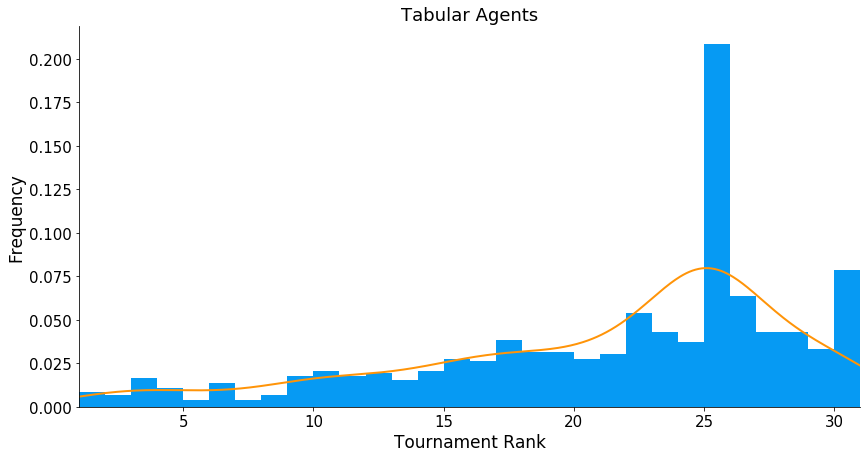

In [14]:
plot_histogram(df["tn_rank"], 30, "Tournament Rank", "Frequency", "Tabular Agents")

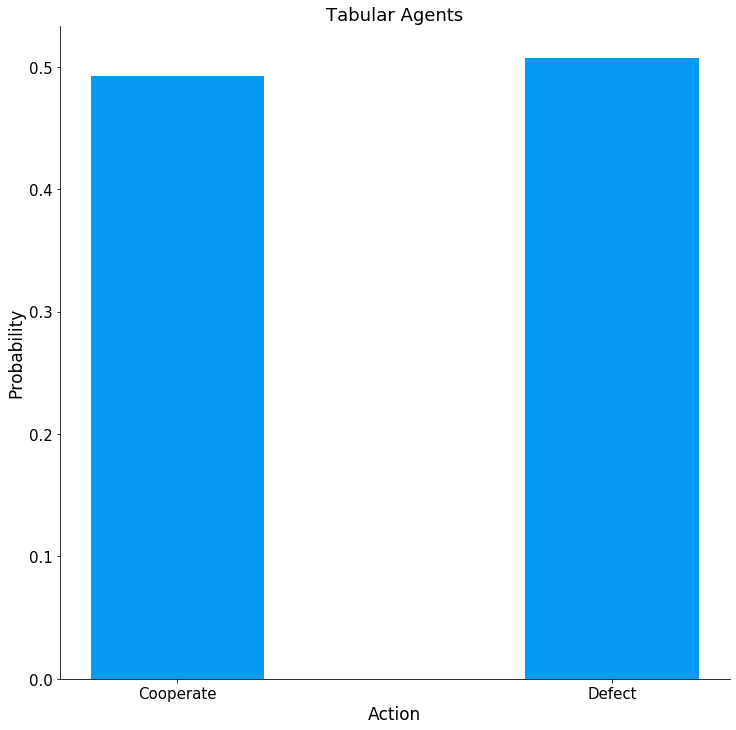

In [17]:
# probability of coop vs defect on a whole for tabular

prob_actions_all = {
    "Action" : ["Cooperate", "Defect"],
    "Probability" : [
        df["tr_cooperation_percentage"].sum() / len(df),
        df["tr_defection_percentage"].sum() / len(df)
    ]
}
plot_barchart(prob_actions_all, "Action", "Probability", "Tabular Agents")

Number of tabular agents ranking 5th or less: 34


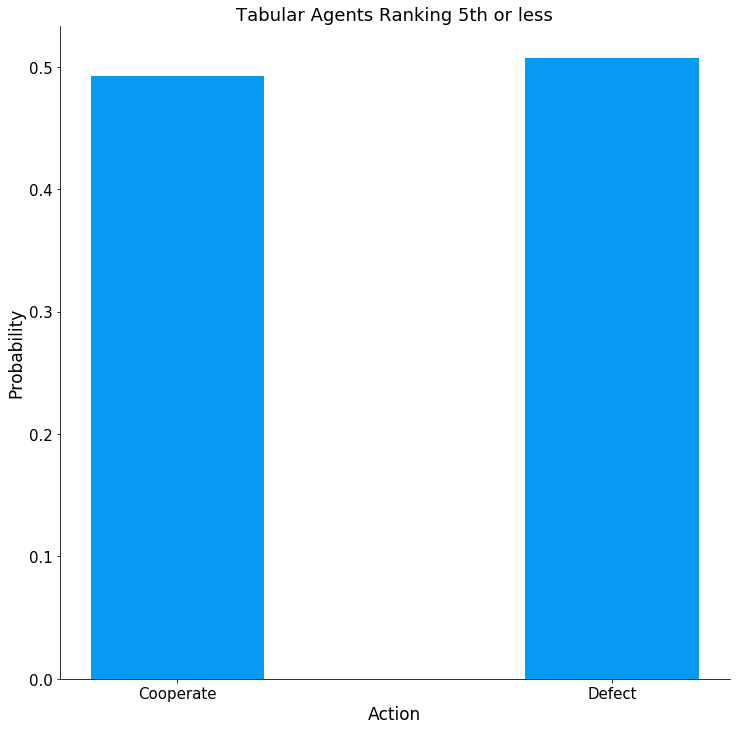

In [27]:
df_agents_top_5 = df[df["tn_rank"] <= 5]
print(f"Number of tabular agents ranking 5th or less: {len(df_agents_top_5)}")

prob_actions_top_5 = {
    "Action" : ["Cooperate", "Defect"],
    "Probability" : [
        df_agents_top_5["tr_cooperation_percentage"].sum() / len(df_agents_top_5),
        df_agents_top_5["tr_defection_percentage"].sum() / len(df_agents_top_5)
    ]
}
plot_barchart(prob_actions_all, "Action", "Probability", "Tabular Agents Ranking 5th or less")

Number of tabular agents ranking 26th or higher: 189


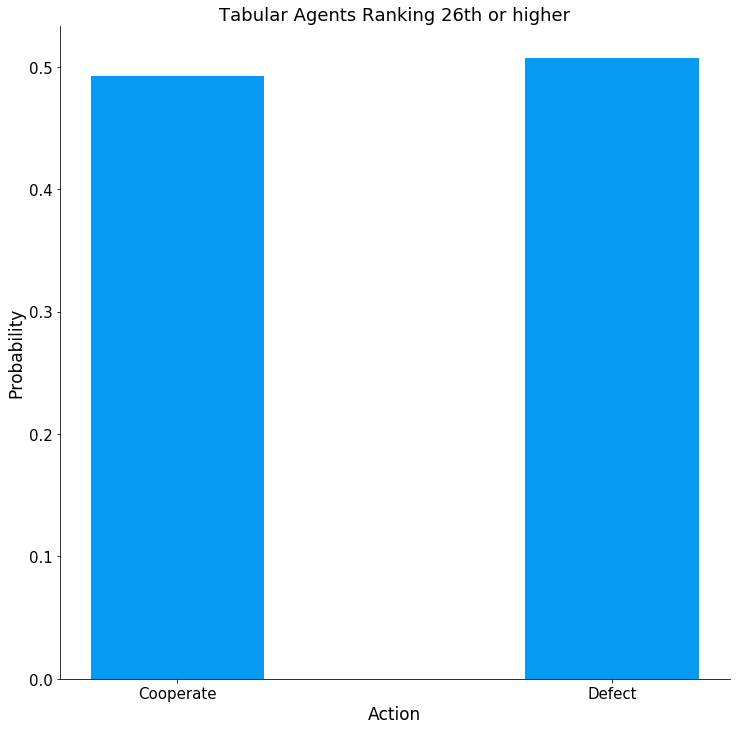

In [28]:
df_agents_bottom_5 = df[df["tn_rank"] >= 26]
print(f"Number of tabular agents ranking 26th or higher: {len(df_agents_bottom_5)}")

prob_actions_bottom_5 = {
    "Action" : ["Cooperate", "Defect"],
    "Probability" : [
        df_agents_bottom_5["tr_cooperation_percentage"].sum() / len(df_agents_bottom_5),
        df_agents_bottom_5["tr_defection_percentage"].sum() / len(df_agents_bottom_5)
    ]
}
plot_barchart(prob_actions_all, "Action", "Probability", "Tabular Agents Ranking 26th or higher")